## Compare between different dts when estimating the position through kinematics

Apparently, smaller dt i.e. higher freq will result in more accuracy position estimation.

Latter we shall see what enhencement can MCAn bring to the control


(2, 999999)
0.0001
0.001
0.01
0.1


<Figure size 640x480 with 0 Axes>

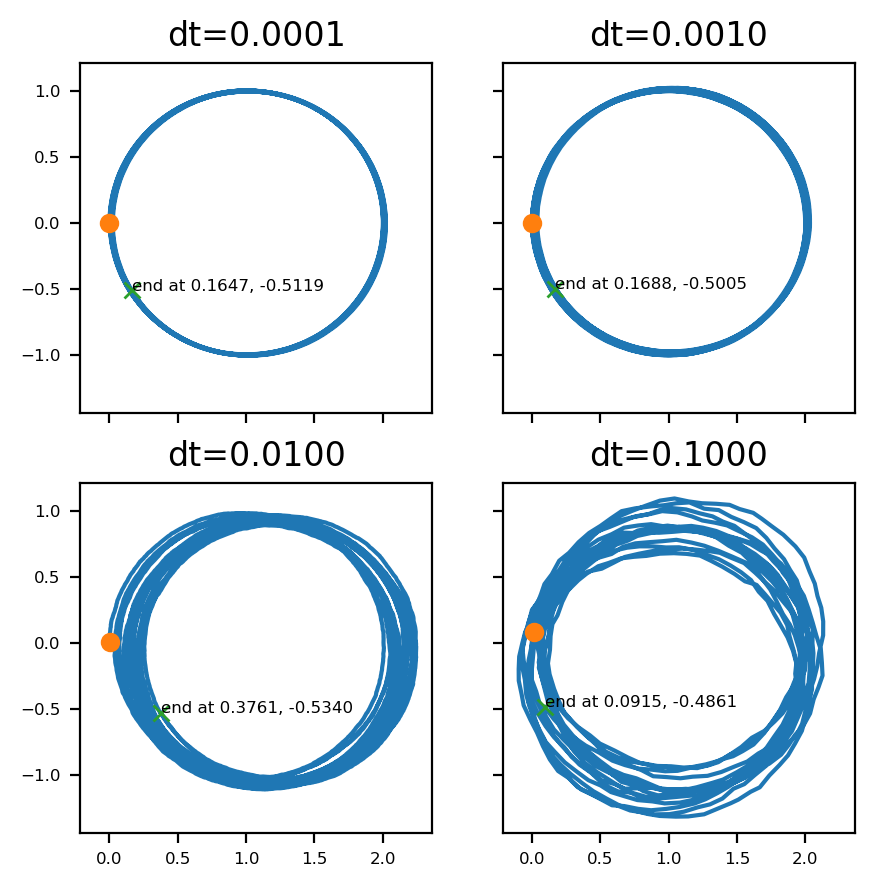

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import ceil, floor, sqrt

total_time = 100
dts=np.logspace(-4, -1, 4)
A_vel=1
A_noise=0.1

min_dt=min(dts)
seed=3407
np.random.seed(seed)
N=int(total_time//min_dt)
times = np.linspace(0, total_time, N)
velocities=np.array([np.sin(times),np.cos(times)])*A_vel
velocities+=np.random.randn(2,N)*A_noise
print(velocities.shape)
def vel_ana(dt):
    return velocities[:,::int(dt/min_dt)]



plt.subplots_adjust(top=0.93)

N=len(dts)
fig, ax = plt.subplots(ceil(sqrt(N)),ceil(sqrt(N)),figsize=(5, 5), dpi=300,sharex=True,sharey=True)

axs=ax.ravel()

for idx,dt in enumerate(dts):
    print(dt)
    # ts = np.arange(0, total_time, dt)
    vels=vel_ana(dt)
    cax=axs[idx]
    locs=np.cumsum(vels, axis=1)*dt
    cax.plot(locs[0], locs[1],'-',label=f'dt={dt:.4f}')
    cax.set_title(f'dt={dt:.4f}')
    cax.tick_params(axis='x', labelsize=6)
    cax.tick_params(axis='y', labelsize=6)
    cax.plot(locs[0,0], locs[1,0],'o',label=f'dt={dt:.4f}')
    cax.plot(locs[0,-1], locs[1,-1],'x',label=f'dt={dt:.4f}')
    cax.text(locs[0,-1], locs[1,-1],f'end at {locs[0,-1]:.4f}, {locs[1,-1]:.4f}',fontsize=6)

# fig.legend(loc='lower center',ncol=5,bbox_to_anchor=(0.5,1.0),prop={'size': 10})



In [4]:
import math
import numpy as np

func1 = lambda x: int(math.ceil(x)) if x < 0 else int(math.floor(x))
func2 = lambda x: int(x)
func1 = np.vectorize(func1)
func2 = np.vectorize(func2)

test_x=np.linspace(-10,10,1000)
assert np.allclose(func1(test_x),func2(test_x))

In [27]:
import random
from timeit import timeit
class Object(object):
    def __init__(self,N) -> None:
        self.N=N
    def full_shift(self,prev_weights,delta_row,delta_col):
        non_zero_rows, non_zero_cols=np.nonzero(prev_weights)
        full_shift=np.zeros((self.N[0],self.N[1]))
        shifted_row_ids, shifted_col_ids=(non_zero_rows +int(delta_row))%self.N[0], (non_zero_cols+ int(delta_col))%self.N[1]
        full_shift[shifted_row_ids, shifted_col_ids]=prev_weights[non_zero_rows, non_zero_cols]
        return full_shift
        # assert np.allclose(self.fractional_shift(full_shift,delta_row,delta_col),self.fractional_shift_new(full_shift,delta_row,delta_col)), f"wrong at delta{delta_row},{delta_row}"
        # copy_shift=self.fractional_shift(full_shift,delta_row,delta_col)*self.activity_mag
        
    def full_shift2(self,prev_weights,delta_row,delta_col):
        full_shift=prev_weights
        # non_zero_rows, non_zero_cols=np.nonzero(prev_weights)
        delta_row,delta_col=int(delta_row),int(delta_col)
        # full_shift=np.zeros((self.N[0],self.N[1]))
        # full_shift[non_zero_rows, non_zero_cols]=prev_weights[non_zero_rows, non_zero_cols]
        full_shift=np.roll(full_shift,delta_row,axis=0)
        full_shift=np.roll(full_shift,delta_col,axis=1)
        return full_shift

Shape=(100,100)
test_ob=Object(Shape)
pre_weights=np.random.rand(*Shape)
for da,db in zip(np.linspace(-10,10,100),np.linspace(-10,10,100)):
    ans1=test_ob.full_shift(pre_weights,da,db)
    ans2=test_ob.full_shift2(pre_weights,da,db)
    assert np.allclose(ans1,ans2), "wrong at da,db={da},{db}"

print(timeit(lambda:test_ob.full_shift(pre_weights,random.random(),random.random()),number=1000),timeit(lambda:test_ob.full_shift2(pre_weights,random.random(),random.random()),number=1000))

# print(timeit(lambda:test_ob.full_shift(np.ones((10,10)),da,db),number=1000),timeit(lambda:test_ob.full_shift2(np.ones((10,10)),da,db),number=1000))


0.2828228440193925 0.026924223988316953


In [33]:
import pykitti
import numpy as np
base_dir="Datasets/kitti_dataset"

kitti=pykitti.odometry(base_dir, '00')

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'int'

In [31]:
np.array(kitti.poses).shape
# sparse_gt=np.array(kitti.poses)
# data_x = sparse_gt[:, :, 3][:, 0]  # [:200]
# data_y = sparse_gt[:, :, 3][:, 2]  # [:200]
# gt_poses = np.stack([data_x, data_y], axis=1)
gt_poses = sparse_gt[:, :, 3][:, [0, 2]]

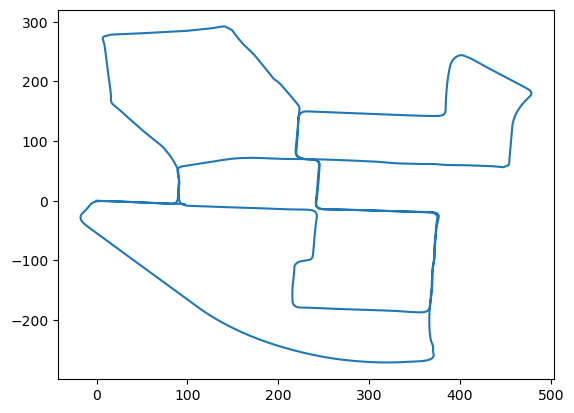

In [32]:
import matplotlib.pyplot as plt
plt.plot(gt_poses[:,1],gt_poses[:,0])